#                              Machine Leaning (Spring 2023) 
##                                  Hands on 5 - Support Vector Machines
###                                         Hamid Khodadadi (hamidkhodadadi@ut.ac.ir)

Support Vector Machines(SVM) is a supervised machine learning algorithm used for classification and regression tasks. SVM aims to find an optimal hyperplane that separates data points into different classes or predicts continuous values.

SVM works by mapping the input data into a high-dimensional feature space, where it attempts to find the optimal hyperplane that maximally separates the classes. The algorithm determines this hyperplane by solving an optimization problem, considering both the margin and the misclassification error.

There are different types of SVMs, such as linear SVM, polynomial SVM, and radial basis function (RBF) SVM. Linear SVM uses a linear kernel to separate the data, while polynomial SVM and RBF SVM employ nonlinear kernels to handle more complex data distributions.

SVM has several advantages:

1) Effective in high-dimensional spaces: SVM performs well when the number of features is greater than the number of samples, making it suitable for tasks involving many variables.

2) Robust to outliers: SVM is less affected by outliers due to the use of support vectors.

3) Versatile kernel functions: SVM allows the use of various kernel functions to handle nonlinear data and find complex decision boundaries.

4) Global solution: SVM finds the global optimum, avoiding local optima.

SVM also has a few limitations:

1) Computationally expensive: Training an SVM can be time-consuming, especially when dealing with large datasets.

2) Sensitivity to parameter tuning: The performance of SVM can be sensitive to the choice of parameters, such as the kernel function and regularization parameter.

3) Memory-intensive: SVM requires significant memory to store the support vectors and decision boundaries, which can be a limitation for large-scale applications.

### Classification:

#### 1) Hard Margin SVM:
Hard margin SVM aims to find a hyperplane that completely separates the data points of different classes with a margin of maximum width. It assumes that the data is linearly separable without any errors or outliers. In other words, it seeks to find a hyperplane such that all the training data points are correctly classified and lie strictly on the correct side of the decision boundary. However, in real-world scenarios, it is often difficult to find a hyperplane that perfectly separates the classes due to noisy or overlapping data. In such cases, the hard margin SVM may fail or produce overfitting. Therefore, soft margin SVM was introduced to handle these situations.

#### 2) Soft Margin SVM:
Soft margin SVM allows for some misclassifications and violations of the strict separation requirement to achieve a more flexible decision boundary. It introduces a slack variable for each data point, which allows certain training examples to be on the wrong side of the decision boundary or within the margin. The soft margin SVM optimization problem is modified by introducing a regularization parameter, often denoted as 'C'. The 'C' parameter controls the trade-off between maximizing the margin and minimizing the misclassification errors. A large 'C' value implies a smaller margin but fewer misclassifications, while a small 'C' value allows a larger margin but allows more misclassifications.

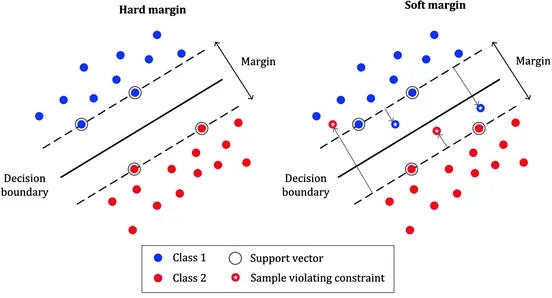

### Regression: 

Support Vector Machines (SVM) can also be used for regression tasks, known as Support Vector Regression (SVR). While SVM classification focuses on finding a hyperplane that separates classes, SVR aims to find a hyperplane that fits the data points as closely as possible, minimizing the deviation from the hyperplane. In SVR, the goal is to find a hyperplane that lies within a certain distance, called the epsilon-insensitive tube, of as many data points as possible. This tube is defined by two boundaries: an upper boundary (ε) and a lower boundary (-ε). Data points within this tube are considered to have zero error and do not contribute to the loss function, while points outside the tube contribute to the loss.

SVR also employs the use of kernel functions, similar to SVM classification, to handle nonlinear regression problems. By mapping the data to a higher-dimensional feature space, SVR can find nonlinear decision boundaries and capture complex patterns in the data.

Some important parameters in SVR include:

1) Kernel function: The choice of kernel determines the mapping of the data to a higher-dimensional space. Common kernel functions include linear, polynomial, and radial basis function (RBF).

2) Regularization parameter (C): It controls the trade-off between minimizing the error and allowing more flexibility in the model. A larger C value leads to a tighter fit, while a smaller C value allows more deviations.

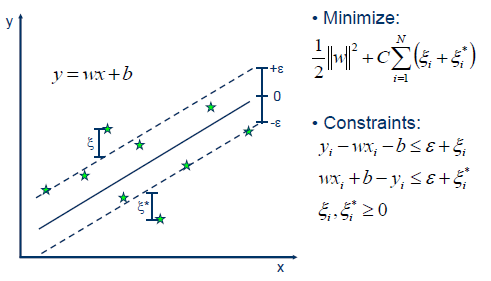

### Kernel functions in SVM:

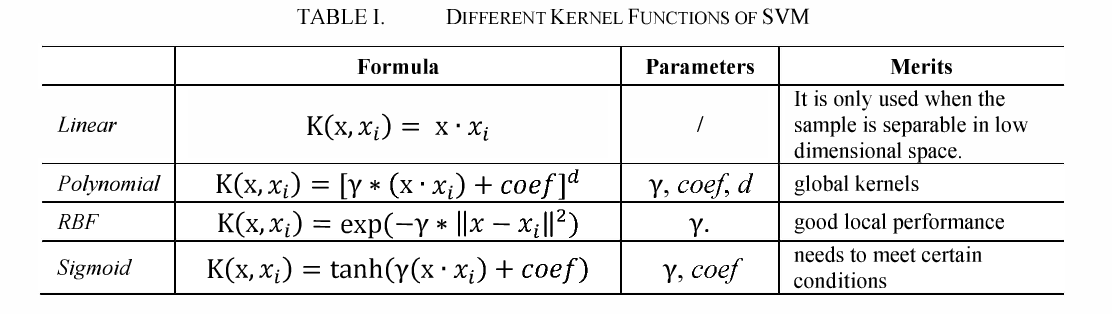

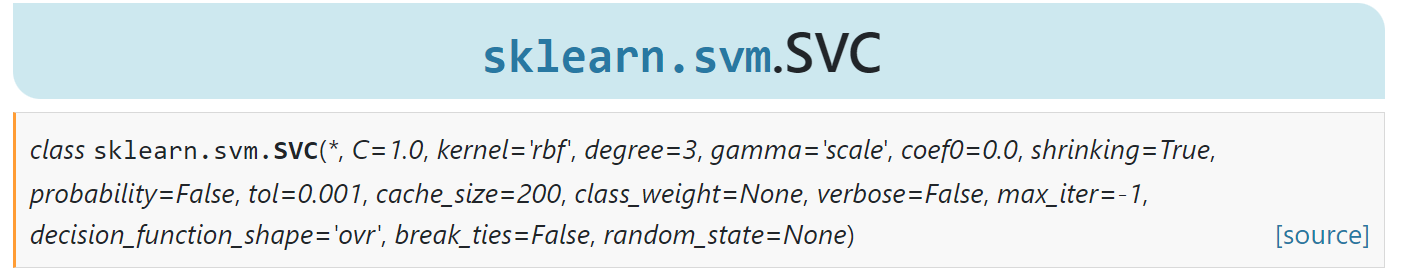
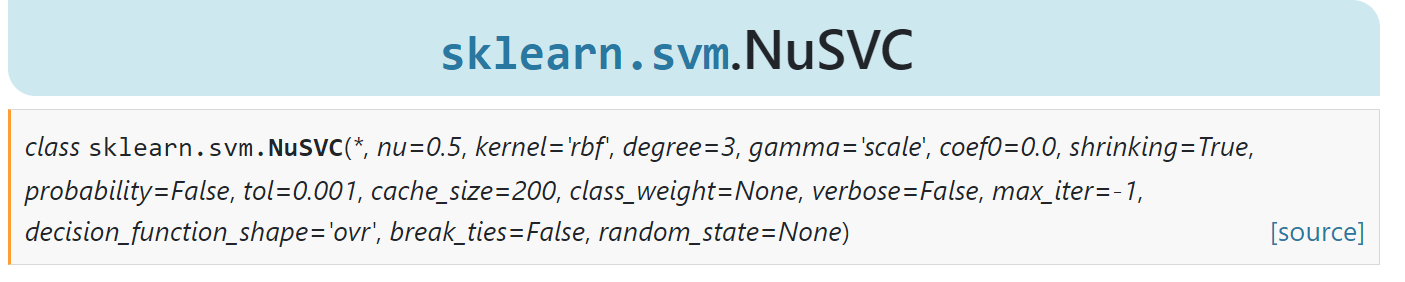
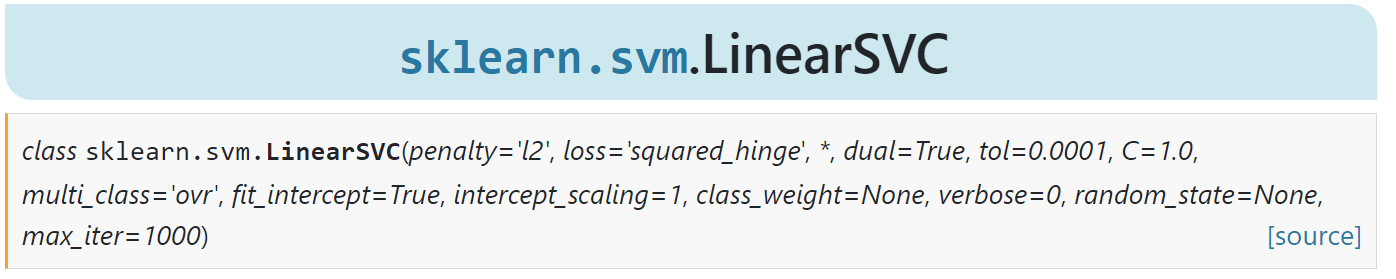
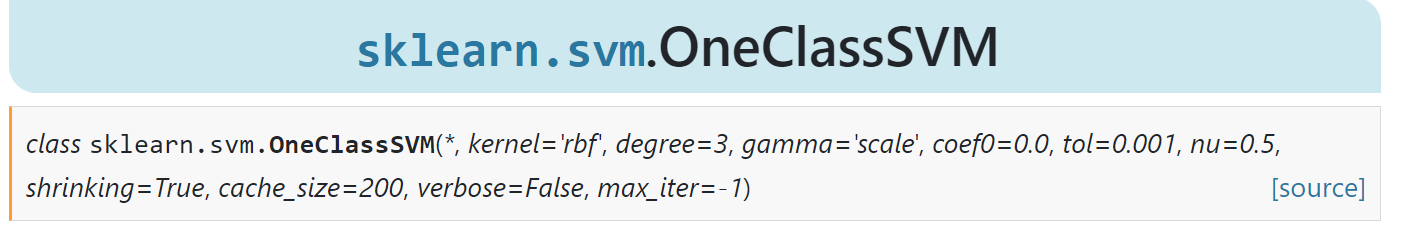

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, 
                           n_classes=3, class_sep=1, random_state=42)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

In [2]:
x.shape, len(y)

((1000, 2), 1000)

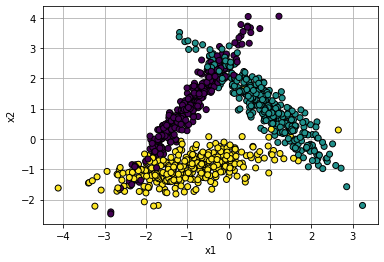

In [3]:
# visualizing the dataset
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x[:,0], x[:,1], c = y, zorder=20, edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [5]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state = 2)
x_test, y_test = shuffle(x_test, y_test, random_state = 2)

In [6]:
np.unique(y_train, return_counts = True)

(array([0, 1, 2]), array([267, 262, 271], dtype=int64))

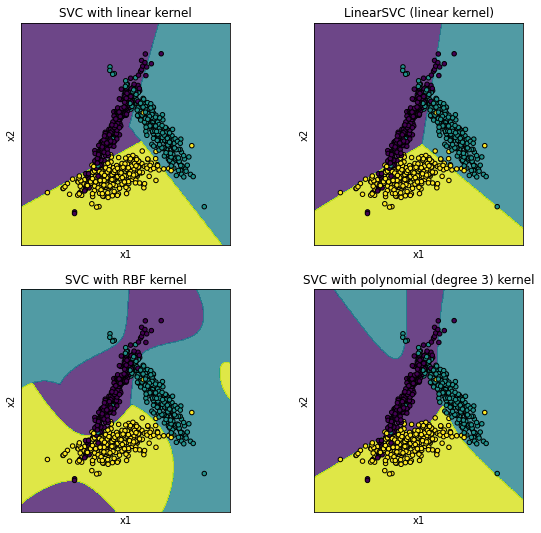

Accuracy of svm with linear kernel: 0.875
Accuracy of svm with LinearSVC (linear kernel): 0.855
Accuracy of svm with RBF kernel: 0.885
Accuracy of svm with polynomial (degree 3) kernel: 0.825


In [7]:
from sklearn import svm

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

x = x_train
y = y_train

class_weight = 'balanced'

models = (svm.SVC(kernel='linear',class_weight=class_weight),
          svm.LinearSVC(class_weight=class_weight),
          svm.SVC(kernel='rbf',class_weight=class_weight),
          svm.SVC(kernel='poly',class_weight=class_weight, degree=3))
models = (clf.fit(x, y) for clf in models)

titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

fig, sub = plt.subplots(2,2,  figsize=(9, 9))
plt.subplots_adjust(wspace=0.4, hspace=0.2)

x0, x1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(x0, x1)

scores = []
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, alpha=0.8)
    ax.scatter(x0, x1, c=y, s=20, edgecolors='k')
    scores.append(clf.score(x_test,y_test))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

print('Accuracy of svm with linear kernel:',scores[0])
print('Accuracy of svm with LinearSVC (linear kernel):',scores[1])
print('Accuracy of svm with RBF kernel:',scores[2])
print('Accuracy of svm with polynomial (degree 3) kernel:',scores[3])

#### GridSearchCV:

GridSearchCV (Grid Search Cross Validation) is a technique used in machine learning to systematically search through a range of hyperparameters for a given model and determine the combination that results in the best performance. It is a brute-force method that exhaustively searches all possible combinations of hyperparameters to find the optimal values.

In GridSearchCV, the hyperparameters of a model are defined as a dictionary, where each key represents the name of the hyperparameter and the values represent the range of possible values for that hyperparameter. The GridSearchCV algorithm then trains and evaluates the model for each combination of hyperparameters in the dictionary using cross-validation.

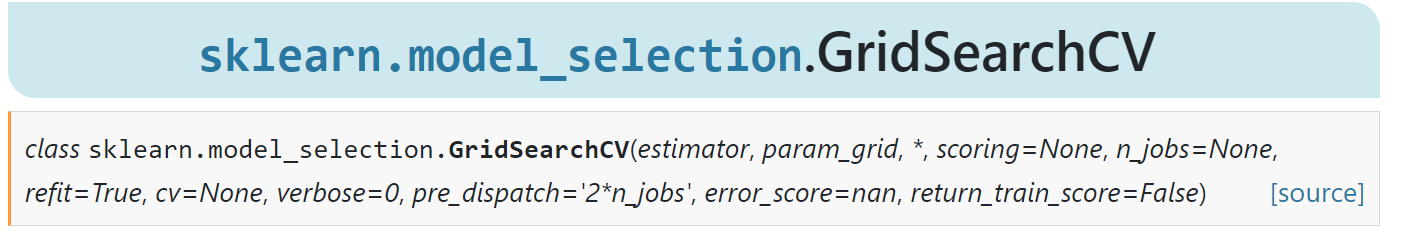

In [8]:
from sklearn.model_selection import GridSearchCV

model = svm.SVC(kernel='poly',class_weight=class_weight, decision_function_shape='ovo')
clf_poly = GridSearchCV(model,param_grid={'C':[.5, .7 ,1, 1.5],'degree':[1 ,2, 3 ,4],
                                   'gamma':[1 ,2 ,3 ,4, 5]},return_train_score='False')
clf_poly.fit(x_train, y_train)
print('best parameters of the model are:',clf_poly.best_params_)
print('accuracy of the model is:',clf_poly.score(x_test,y_test))

best parameters of the model are: {'C': 1, 'degree': 1, 'gamma': 3}
accuracy of the model is: 0.875


In [9]:
# model evaluation
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf_poly.predict(x_test)
print('classification report:')
print(classification_report(y_test, y_pred))

classification report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84        65
           1       0.95      0.77      0.85        71
           2       0.91      0.95      0.93        64

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.87       200



#### Nonlinear regression:

Nonlinear regression and kernel regression are different techniques used to model nonlinear relationships between variables, while SVM (Support Vector Machines) is a machine learning algorithm used for classification and regression analysis. However, SVM can also be used for nonlinear regression and kernel regression.

Nonlinear regression using SVM involves transforming the input data into a higher-dimensional space using a kernel function, such as the radial basis function (RBF) kernel, to capture the nonlinear relationship between the variables. The SVM algorithm then finds the hyperplane that maximizes the margin between the data points in the transformed space.

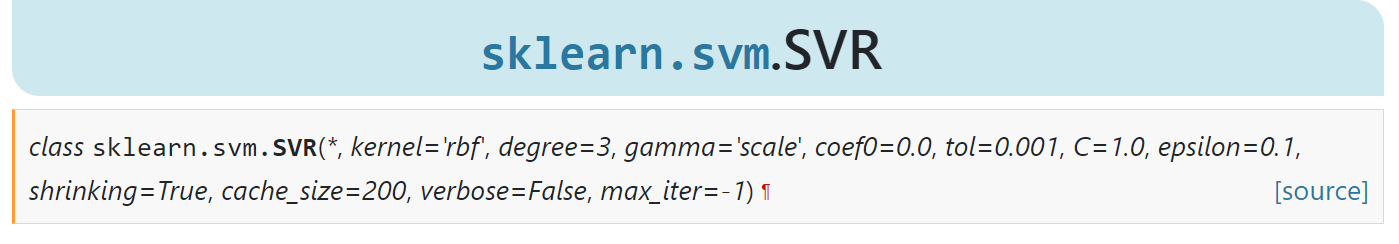
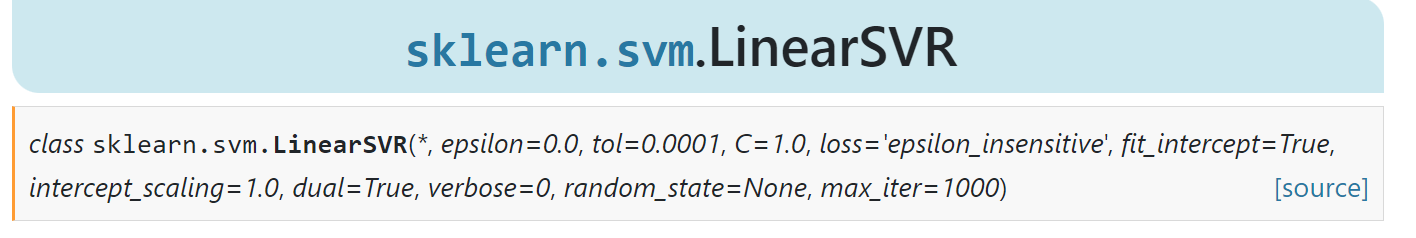
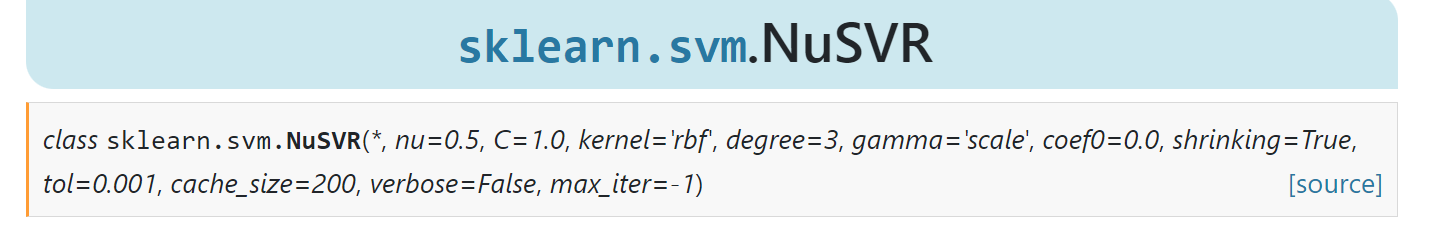

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

data = fetch_california_housing()
x = data.data
y = data.target

# Select 20% of the samples randomly
num_samples = len(x)
indices = np.random.choice(num_samples, size=int(num_samples*0.6), replace=False)
x_selected = x[indices]
y_selected = y[indices]

x_train, x_test, y_train, y_test = train_test_split(x_selected, y_selected, test_size=0.2, random_state=8)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state = 2)
x_test, y_test = shuffle(x_test, y_test, random_state = 2)

In [13]:
x_selected.shape, len(y_selected)

((12384, 8), 12384)

In [14]:
from sklearn import svm

models = [svm.SVR(kernel=kernel) for kernel in ('linear', 'poly', 'rbf')]
scores = []
for reg in models:
    reg.fit(x_train, y_train)
    score = reg.score(x_test, y_test)
    print(f"{reg.kernel} and R squared metric for the model is: {score:.2f}")
    scores.append(score)

linear and R squared metric for the model is: 0.62
poly and R squared metric for the model is: 0.31
rbf and R squared metric for the model is: 0.75
